## Clean and Analyze Employee Exit Surveys

In this project, we'll analyze exit surveys from employees of two educational institutions in Queensland, Australia: the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute.

Our goal is to find out:

- Are employees who worked for a short time leaving because they are unhappy? What about those who worked longer?
- Are younger employees leaving because they are unhappy? What about older employees?

In [1595]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1596]:
# Read data
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [1597]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [1598]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [1599]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [1600]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [1601]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [1602]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

## Observations:
- Both datasets share similar columns, with differing names
- Null values in both datasets
- Excess amount of columns, some may be redundant
- Null value on load for specific cases ("Not Stated")

# Null Value Import and Dropping Redundant Columns

In [1603]:
# Read 'Not Stated' as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated', 'Unknown'])

In [1604]:
# Drop dete columns 28-49
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [1605]:
# Drop tafe columns 17-66
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Changes Made:
- Read in `Not Stated` and `Unknown` as NaN values
- Removed unnecessary columns in both dete_survey and tafe_survey dataframes

## Why:
- Improve useability of dataframes for further processing and analysis

# Clean Columns

In [1606]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [1607]:
tafe_survey_updated.rename(
    {
        'Record ID': 'id',
        'CESSATION YEAR': 'cease_date',
        'Reason for ceasing employment': 'separationtype',
        'Gender. What is your Gender?': 'gender',
        'CurrentAge. Current Age': 'age',
        'Employment Type. Employment Type': 'employment_status',
        'Classification. Classification': 'position',
        'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
        'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
    },
    axis=1,
    inplace=True,
)

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Changes Made:
- Standardized naming scheme in `dete_survey_updated`
- Renamed to matching naming scheme in `tafe_survey_updated`

## Why:
- Keeps consistent column names across both dataframes
- These changes make it easier to work with the dataframes down the road, allowing us to merge them into a combined dataframe more seamlessly

# Data Filtering

In [1608]:
dete_survey_updated['separationtype'].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [1609]:
tafe_survey_updated['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In [1610]:
dete_resignations = dete_survey_updated[
    (dete_survey_updated['separationtype'] == 'Resignation-Other reasons')
    | (dete_survey_updated['separationtype'] == 'Resignation-Other employer')
    | (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')
].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

## Changes Made:
- Filtered both datasets into `dete_resignations` and `tafe_resignations`, respectively, removing non-resignation separation types

## Why:
- Non-resignation separation types will not be useful towards our problem statements

# Verify Data

In [1611]:
dete_resignations['cease_date'].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [1612]:
# Extract year from cease_date
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})').astype(float)

In [1613]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

cease_date
2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: count, dtype: int64

In [1614]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: count, dtype: int64

In [1615]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

cease_date
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: count, dtype: int64

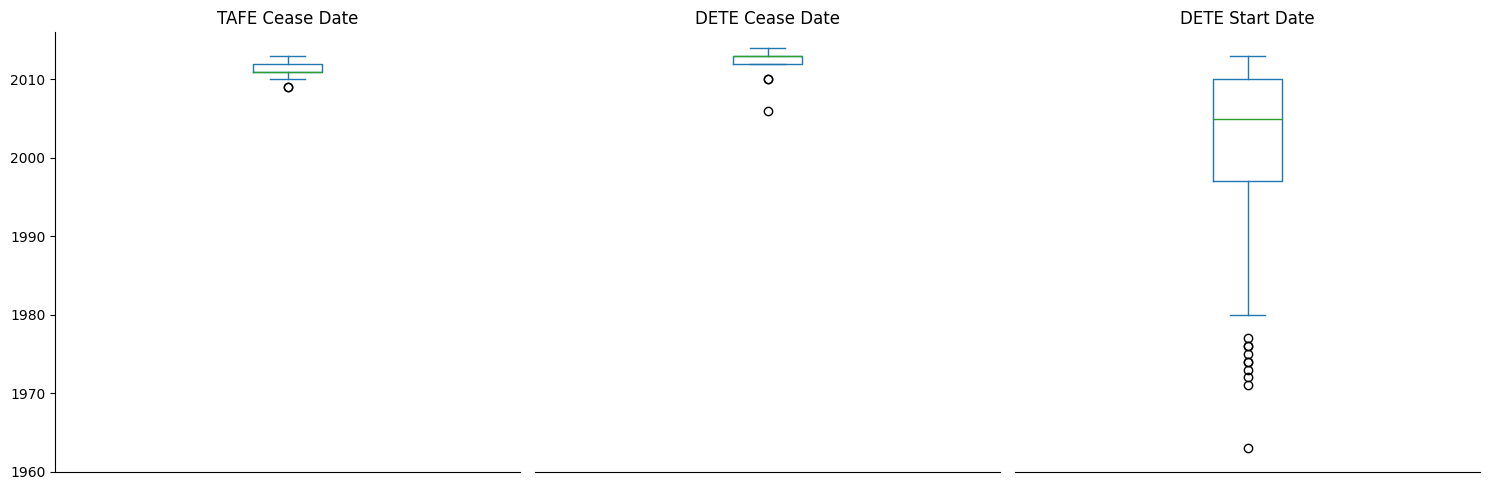

In [1616]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

tafe_resignations['cease_date'].plot(kind='box', ax=axes[0])
dete_resignations['cease_date'].plot(kind='box', ax=axes[1])
dete_resignations['dete_start_date'].plot(kind='box', ax=axes[2])

axes[0].set_ylim(1960, 2016)
axes[0].set_xticks([])
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_title('TAFE Cease Date')

axes[1].set_ylim(1960, 2016)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].spines[['top', 'right', 'left']].set_visible(False)
axes[1].set_title('DETE Cease Date')

axes[2].set_ylim(1960, 2016)
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].spines[['top', 'right', 'left']].set_visible(False)
axes[2].set_title('DETE Start Date')

plt.tight_layout()
plt.show()

## Findings:
- `dete_resignations` and `tafe_resignations` do not share some `cease_date` years
- There are imbalances in amount of entries for some years (e.g. 2010, 2012, 2013)
- Overall ranges are reasonable

# Create New Column

In [1617]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [1618]:
dete_resignations['institute_service'].value_counts().sort_index(ascending=False)

institute_service
49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: count, dtype: int64

## Changes:
- Created new column `institute_service`

## Why:
- Show overall years spent working before resignation, rather than start and end years

# Create `dissatisfied` Column

In [1619]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
Name: count, dtype: int64

In [1620]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
Name: count, dtype: int64

In [1621]:
def update_vals(val):
    """
    Updates a value based on the input string.

    If the input string is null, returns numpy.nan.
    If the input string is '-', returns False.
    Otherwise, returns True.
    """
    if pd.isnull(val) or val == 'NaN':
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [1622]:
# Apply function to tafe columns

tafe_resignations['dissatisfied'] = (
    tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]
    .map(update_vals)
    .any(axis=1, skipna=False)
)
tafe_resignations_up = tafe_resignations.copy()

In [1623]:
# Apply function to dete columns

dete_columns = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload',
]
dete_resignations['dissatisfied'] = dete_resignations[dete_columns].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [1624]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    241
True      99
Name: count, dtype: int64

In [1625]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

## Changes Made:
- Update values within relevant dissatisfaction columns
- Assigned results to `tafe_resignations_up` and `dete_resignations_up`
- Created new column `dissatisfied` to store whether an employee resignation was due to dissatisfaction

## Why:
- Storing in a single column will minimize the complexity of analysis

# Combining Data

In [1626]:
# Create new column for identifying which dataset an entry was added from
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [1627]:
# Combine both dataframes
combined = pd.concat([tafe_resignations_up, dete_resignations_up], ignore_index=True)

In [1628]:
# View valid entries
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
career_move_to_private_sector                          311
career_move_to_public_sector                           311
employment_conditions                                  3

In [1629]:
# Drop columns with <500 non-null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
separationtype       651
id                   651
dissatisfied         651
institute            651
dtype: int64

## Changes Made:
- Created new column `institute` to identify origin dataset
- Combined datasets
- Dropped columns with less than 500 valid entries

## Why:
- A combined dataset with an identifiable marker (`institute` column) can help us perform analyses on the overall data later on
- Dropping columns that contain too many null entries helps to reduce complexity in analysis for columns that do not contain useful data

# Clean `institute_service` Column

In [1630]:
# View entries
combined_updated['institute_service'].value_counts(dropna=False)

institute_service
NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
14.0                   6
17.0                   6
12.0                   6
22.0                   6
16.0                   5
18.0                   5
23.0                   4
24.0                   4
11.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
30.0                   2
26.0                   2
36.0                   2
25.0                   2
28.0   

In [1631]:
# Extract years and convert to float
combined_updated['institute_service_up'] = (
    combined_updated['institute_service'].astype(str).str.extract(r'([0-9]+)').astype(float)
)

# Verify
combined_updated['institute_service_up'].value_counts()

institute_service_up
1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
9.0      14
2.0      14
8.0       8
13.0      8
15.0      7
12.0      6
22.0      6
14.0      6
17.0      6
10.0      6
18.0      5
16.0      5
23.0      4
24.0      4
32.0      3
19.0      3
39.0      3
21.0      3
30.0      2
26.0      2
36.0      2
28.0      2
25.0      2
35.0      1
38.0      1
33.0      1
49.0      1
27.0      1
41.0      1
42.0      1
29.0      1
34.0      1
31.0      1
Name: count, dtype: int64

In [1632]:
def update_institute_service(val: float) -> str:
    """
    Update the institute service level based on the provided value.

    Args:
        val (float): The value to determine the institute service level.

    Returns:
        str: The institute service level as one of 'New', 'Experienced', 'Established', or 'Veteran'.
    """
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'

In [1633]:
# Map institute service to new category
combined_updated['service_cat'] = combined_updated['institute_service_up'].map(update_institute_service)
combined_updated['service_cat'].value_counts()

service_cat
New            193
Experienced    172
Veteran        136
Established     62
Name: count, dtype: int64

## Changes Made:
- Extracted years and cleaned result from `institute_service` into `institute_service_up`
- Created new column for categorizing service years into: `['New', 'Experienced', 'Established', 'Veteran']`

## Why:
- These changes will provide a clean measure of institute service years for further analysis
- Service category allows us to create different visualizations by category


# Initial Analysis

In [1634]:
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    403
True     248
Name: count, dtype: int64

In [1635]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [1636]:
# Create pivot table for categories
service_dissatisfied = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
service_dissatisfied = service_dissatisfied.reindex(['New', 'Experienced', 'Established', 'Veteran'])
service_dissatisfied

,dissatisfied
service_cat,
New,0.295337
Experienced,0.343023
Established,0.516129
Veteran,0.485294


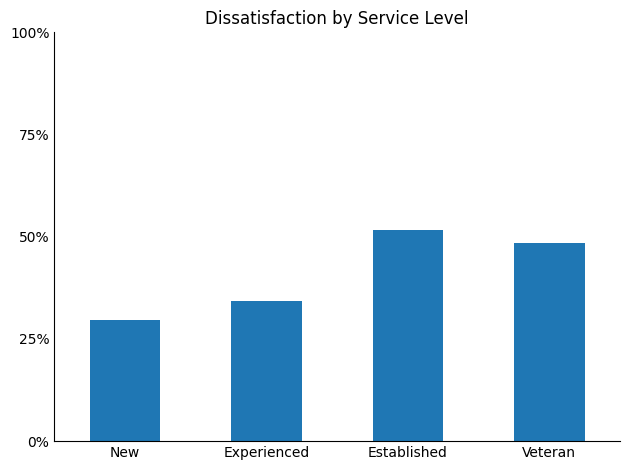

In [1637]:
service_dissatisfied.plot(kind='bar', legend=False)

plt.title('Dissatisfaction by Service Level')

plt.xticks(rotation=0)
plt.xlabel('')

plt.ylim(0, 1)
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])

plt.tick_params(length=0)

plt.tight_layout()
sns.despine()
plt.show()

# Observations:
- Overall dissatisfaction averages upward towards more years of institute service
- Peaks for established individuals (7-10 years at a company), with veteran individuals (11 or more years at a company) experiencing slightly less dissatisfaction

# Takeaways:
- Employees are more dissatisfied the longer they work
- Focus on preventing dissatisfaction among more-established workers to prevent resignation down the line

# Analyze by Age

In [1638]:
combined_updated.columns

Index(['id', 'cease_date', 'separationtype', 'gender', 'age',
       'employment_status', 'position', 'institute_service', 'dissatisfied',
       'institute', 'institute_service_up', 'service_cat'],
      dtype='object')

In [1639]:
combined_updated['age'].value_counts(dropna=False)

age
51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: count, dtype: int64

In [1640]:
# Extract age and convert to float
combined_updated['age'] = combined_updated['age'].astype(str).str.extract(r'([0-9]+)').astype(float)
combined_updated['age'].value_counts(dropna=False).sort_index()

age
20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    55
61.0    23
NaN     55
Name: count, dtype: int64

In [1641]:
def update_age(val: float) -> str:
    """
    Updates the age category for a given age value.

    Args:
        val (float): The age value to categorize.

    Returns:
        str: The age category, one of 'Young Adult', 'Middle-Aged Adult', or 'Senior'.
    """
    if pd.isnull(val):
        return np.nan
    elif val < 40:
        return 'Young Adult'
    elif val < 65:
        return 'Middle-Aged Adult'
    else:
        return 'Senior'

In [1642]:
# Apply update_age to age and create new column for category
combined_updated['age_cat'] = combined_updated['age'].map(update_age)
combined_updated['age_cat'].value_counts(dropna=False)

age_cat
Middle-Aged Adult    323
Young Adult          273
NaN                   55
Name: count, dtype: int64

In [1643]:
# Create pivot table from age category
age_dissatisfied = combined_updated.pivot_table(index='age_cat', values='dissatisfied')
age_dissatisfied = age_dissatisfied.reindex(['Young Adult', 'Middle-Aged Adult'])
age_dissatisfied

,dissatisfied
age_cat,
Young Adult,0.355311
Middle-Aged Adult,0.399381


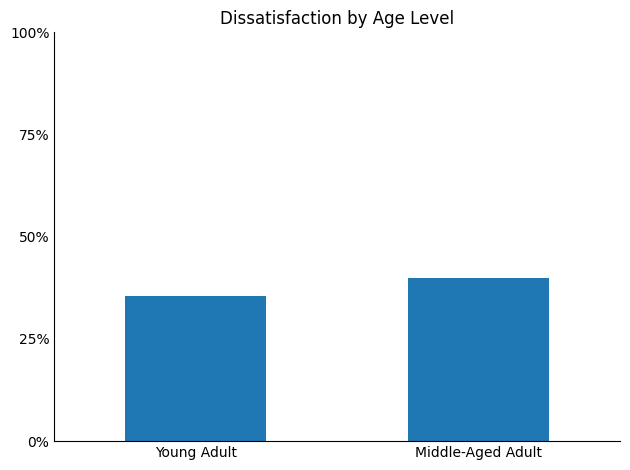

In [1644]:
age_dissatisfied.plot(kind='bar', legend=False)

plt.title('Dissatisfaction by Age Level')

plt.xticks(rotation=0)
plt.xlabel('')

plt.ylim(0, 1)
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])

plt.tick_params(length=0)

plt.tight_layout()
sns.despine()
plt.show()

## Observations
- Young adults are leaving at a slightly lower average due to dissatisfaction compared to middle-aged adults
- Overall dissatisfaction for both age groups is between 35-40%

## Takeaways:
- Dissatisfaction is a key factor in resignation reasonings for all age groups